# Ungraded Lab - The Monty Hall Problem

Welcome! In this ungraded lab you will see the counter intuitive nature of probability by studying the famous Monty Hall problem. This problem seems very trivial at first glance but it exemplifies the fact that probabilities can have behaviours you might not initially expect.

Begin by importing the required libraries for the lab:

In [22]:
import numpy as np
import utils2

%matplotlib widget

### 1. Problem introduction

Suppose you are in a TV show where you may win a car by playing a game. The game is very simple: you have to choose among three closed doors. One door has the car and the other two have goats.

The game is played in two steps:

1. The host lets you choose one among the three doors, but you do not open it yet.
2. Then, the host (who knows where the car is) choose one among the two remaining doors and open it, revealing a goat. 

<figure>
<p align = 'center'>
<img src="images/monty_hall_doors.svg" width="300">
<figcaption>Monty Hall Problem - from Wikipedia</figcaption>
</p>

</figure>


The time to choose has come and let's suppose you have chosen door number 1. Then, just before they open the door number 1, the Host - who already knows in which door the car is behind - opens door number 3, revealing a goat and leaving doors number 1 and 2 closed. The Host then asks you:

**"Would you like to switch your choice to door number 2?"**

This question seems weird, since the host knows which door is the winner, maybe he is trying to trick you into choosing poorly. What would you do? Would you change doors, or you would stick to door number 1?

Since you are becoming more familiar with Probability and Statistics, you can think even further. What would give you the highest probability to win? Switching doors or keeping your choice? Does it matter?

Well, you have Python in your hands, so, in this noteobok you will simulate this game and answer this question by yourself! At first, you can try the game in real time just below, and you may get some idea of what might goes on!

## 2. Try the game for yourself!

By running the next cell you can play the game for a while and try out different strategies. In the left panel you will get the actual game, these are the instructions to play:

- To start a new game simply select one of the three available doors.
- After you select an initial door the host will open one of the two remaining ones and it will always have a goat behind it.
- Then you can decide if you would like to stay or switch doors.
- If you pick the door opened by the host that game will not count.
- If you click outside any of the three doors then the game will restart and not be counted.
- After the prizes are shown (game has ended) click anywhere on the screen to restart the game.
- If you want to restart the counters, run the cell again

The right panel keeps track of the number of games played and the success rate for both strategies. Try it for a while and see if you can find any patterns!

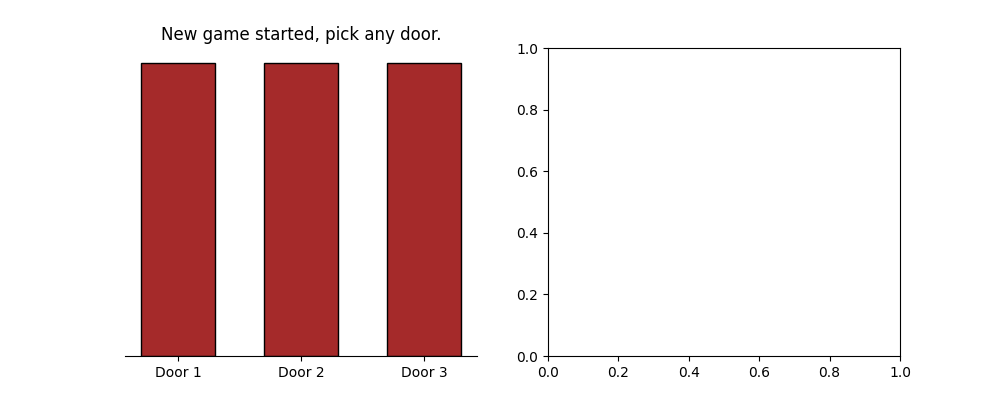

In [23]:
game = utils2.monty_hall_game()

Before going forward make sure that you played the game enough times to formulate an hypothesis. Is is better to switch doors? Is it better to stay on your initial guess? Or it simply does not make a difference?

## 3. Simulate the game for many iterations

After playing for a while you might have come up with some hypothesis about the preferred strategy to beat this game. Now you will simulate the game for many iterations and see if the success rate varies from one strategy to the other.

In order to do this, the `monty_hall` function is provided. This function takes a single argument which is a boolean that controls if you decide to switch doors or not. Take a look at the code comments if you want to understand how the implementation works. Notice that the value of `0` is used to represent a goat, while `1` represents a car:

In [24]:
def monty_hall(switch):

    # All doors have a goat initially
    doors = np.array([0, 0, 0])

    # Randomnly decide which door will have a car
    winner_index = np.random.randint(0, 3)

    # Place the car in the winner door
    doors[winner_index] = 1

    # Participant selects a door at random
    choice = np.random.randint(0, 3)

    # Get doors that can be opened (host cannot open the door chosen or the one with the car)
    openable_doors = [i for i in range(3) if i not in (winner_index, choice)]

    # Host opens one of the available doors at random
    door_to_open = np.random.choice(openable_doors)

    # Switch to the other available door (the one that is not the original choice or the opened one)
    if switch:
        choice = [i for i in range(3) if i not in (choice, door_to_open)][0]

    # Return 1 if you open a door with a car, 0 otherwise
    return doors[choice]

You can use the function above to simulate one run of the game. However this would not be very practical, it is better to use the function to try a bunch of different runs at once and save the results. This way you can know for sure if one strategy beats the other after consistently using it.

You can pass the above function to another function that lets you decide a strategy and perform simulations for 1, 10, 100 and 1000 runs. As you increase the number of runs you will see that the strategies converge to their true success rate: 

In [25]:
utils2.success_rate_plot(monty_hall)

interactive(children=(RadioButtons(description='Switch Doors?', index=1, options=(True, False), value=False), …

## 4. Analytical Solution

Now you are familiar with the problem and you have gotten a strong evidence that the best strategy is to **switch doors** because it will make you win about 67% of the times! 

You now will see it analytically! For this, first let's make some definitions. 

Define the events:

$E_1$ = the car is behind door 1
$E_2$ = the car is behind door 2
$E_3$ = the car is behind door 3

Or, in a more concise way: $E_i$ = the car is behind door $i$ for $i = 1,2,3$. 

Note that these events are **mutually exclusive**, in other words, you cannot have a car simuntaneously in two doors, because of the rules of the game. This means that,

$P(E_1 \cap E_2) = 0$, $P(E_1 \cap E_3) = 0$ and $P(E_2 \cap E_3) = 0$. You can say it also by writing that 

$$P(E_i \cap E_j) = 0  \text{      for } i \neq j.$$

Another fact, due to the rules of the game, is that **the car is behind one of the three doors**, so 

$$P(E_1 \cup E_2 \cup E_3) = 1.$$

This is, in fact, the **sample space**, or **universe**, $\Omega$, because it is the set of all possible outcomes.

Let's suppose you've chosen **door number 1**. Since there is an equal chance of the car being behind one of the three doors, we know that 
$$P(E_1) = \frac{1}{3}.$$

By the **complement rule**, we know that $P(E_1^c) = 1 - P(E_1) = 1 - \frac{1}{3} = \frac{2}{3}$

Since the universe is given by $E_1 \cup E_2 \cup E_3$ (the car is behind door 1 OR door 2 OR door 3), then $E_1^c = E_2 \cup E_3$, therefore $P(E_2 \cup E_3) = \frac{2}{3}$. You can have a visual idea in the image below.

<figure>
<p align = 'center'>
<img src="images/monty_closed_doors.svg" width="300">
<figcaption>Monty Hall Closed Doors - from Wikipedia</figcaption>
</p>

</figure>

Now that you chose door 1, the Host then opens door 3, revealing a goat and asks you if you want to switch doors. If you don't switch, the probability of winning remains $\frac{1}{3}$ because this is your initial choice. If you **do** switch, then, you can notice that the Host **gave you an additional information**. They showed to you that door 3 does not have a car, which means that 

$$P(E_3) = 0.$$

Now you are mostly done, because as you know, $\frac{2}{3} = P(E_2 \cup E_3) = P(E_2) + P(E_3) - P(E_2 \cap E_3)$. You already know that $P(E_2 \cap E_3) = 0$, because they are mutually exclusive events (the car is behind in only **one** of the three doors), and the Host gave you a very importante piece of additional information: $P(E_3) = 0$. With this, you can easily conclude that:

$$P(win | switch) = P(E_2) = \frac{2}{3}.$$

In other words, the probability that the car is behind door 2, **given that** it is not behind door 3 is $\frac{2}{3} \approx 0.67$ as you have just seen in your simulations!


## 5 Generalized Monty Hall problem (optional)

Let's consider a new game, more general.

Now, the game is:
- There are $n$ doors, and you must choose one door.
- Host opens $k$ doors and revealing goats.
- You may or may not change your previously chosen door.

Would it still be better to switch doors? Would it depend on $k$ or on $n$? 


## 5.1 Simulation

You can simulate the problem to build your intuition. 

In [26]:
def generalized_monty_hall(switch, n = 3, k = 1):
    if not (0 <= k <= n-2):
        raise ValueError('k must be between 0 and n-2, so the Host can leave at least 1 openable door!')
    
    # All doors have a goat initially
    doors = np.array([0 for _ in range(n)])
    
    # Decide which door will have a car
    winner = np.random.randint(0,n)

    # Place the car in the winner door
    doors[winner] = 1.0
    
    # Participant selects a door at random
    choice = np.random.randint(0,n)
    
    # Get doors that can be opened (host cannot open the door chosen or the one with the car)
    openable_doors = [i for i in range(n) if i not in (winner, choice)]
    
    # Host open k of the available doors at random
    door_to_open = np.random.choice(openable_doors, size = k, replace = False)
    
    # Switch to the other available door (the one that is not the original choice or the opened one)
    if switch:
        choices = [i for i in range(n) if i not in np.array(choice) and i not in np.array(door_to_open)]
        # Player chooses another door at random
        choice = np.random.choice(choices)
    
    # Return 1 if you open a door with a car, 0 otherwise
    return doors[choice]

In [27]:
utils2.success_rate_plot(generalized_monty_hall)

interactive(children=(RadioButtons(description='Switch Doors?', index=1, options=(True, False), value=False), …

## 5.2 Analytical solution

This section is more advanced, you may skip it if you want to! 

Now, the game is:
- There are $n$ doors, and you must choose one door.
- Host opens $k$ doors and revealing goats.
- You may or may not change your previously chosen door.

The question is: is it always better to switch doors? Will it depend on $k$? 

To answer this question analyticaly, first define the following events:

$$E_i = \text{ the car is behind door i. In this case, } i = 1, \ldots, n.$$

Again, the $E_i$'s are independent from each other, because there is only $1$ car available.

Note that, since the Host never opens the same door the player chose and also never opens the winning door, there is an upper bound for $k$, which is $n-2$, so $$ 0 \leq k \leq n-2.$$ 

Two facts can be assumed:

- The player chooses door $1$
- The host opens doors $2, \ldots, k+1$

This is because we can always rename the doors to get this result. For instance, if the player chooses door number $10$, we can rename it as door $1$ and door $1$ will become door $10$. This is just to avoid getting too complex on indices notations. In math terminology, it is usually said that we can do this *without loss of generality*, since it will not affect the final result. 

Now that there are $n$ doors, the probability that the car is behind door $1$ is $\frac{1}{n}$, i.e.,
$$P(E_1) = \frac{1}{n}.$$

By the complement rule, the probability that the car is **not** behind door $1$ is:

$$P(E_1^c) = 1 - P(E_1) = 1 - \frac{1}{n} = \frac{n-1}{n}.$$

Note that $$E_1^c = E_2 \cup E_3 \cup \ldots \cup E_n.$$

There is a notation to simplify the right hand side equation above, we can write it as:

$$\bigcup_{i = 2}^{n} E_i.$$

This works in the same fashion as a summation symbol, but the opeartion being performed is set union.

So, we know that 

$$P\left(\bigcup_{i = 2}^{n} E_i\right) = \frac{n-1}{n}.$$

Now we can answer the question: What is the probability of winning, given that we switch doors?

Let's take a look on the following image:

<figure>
<p align = 'center'>
<img src="images\monty_hall_n_k.svg" width="900">
<figcaption>Monty Hall Problem - adapted from Wikipedia</figcaption>
</p>

</figure>

If the player switches to a random available door, then they must choose one of the $k+2, k+3, \ldots, n-1, n$. Therefore, the probability of picking the car is:

The probability of **not picking the car** in door $1$ $\left(P(E_1^c) = \frac{n-1}{n}\right)$ times the probability of picking the car **now**, which is $\frac{1}{n-k-1}$ because this is the number of remaining doors. 

So, the final probability is given by

$$P(win | switch) = \frac{n-1}{n} \cdot \frac{1}{n-k-1}.$$

It can be rewriten in the following manner:

$$P(win | switch) = \frac{n-1}{n} \cdot \frac{1}{n-k-1} = \frac{1}{n} \cdot \frac{n-1}{n-k-1} \geq \frac{1}{n} = P(E_1) = P(win | not\ switch).$$

And the equality only holds when $k = 0$. This means that the host does not open any door.

Therefore, **it is always better to switch doors**. This may sound counterintuitive at first, but think that switching doors you are using the **new piece of information** that the host gave you, whereas if you choose not to switch, you will be ignoring this new information.

**Congratulations! You have finished the ungraded lab on the Monty Hall problem!**